## Image cluster for classification

In [1]:
from keras_preprocessing.image import load_img 
from keras_preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [2]:
!pwd

/bin/bash: /home/jmwolf/anaconda3/envs/tf_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/jmwolf/repos/XAI_Healthcare


In [3]:
path = "/home/jmwolf/repos/XAI_Healthcare/model_dev/Data_CMC_COADEL_224_1/train/Mitosis" 
# change the working directory to the path where the images are located
#os.chdir(path)
#!pwd
# this list holds all the image filename
mitosis = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            mitosis.append(file.name)
       

In [4]:
mitosis[:15]

['8739.jpg',
 '5314.jpg',
 '16105.jpg',
 '16525.jpg',
 '11038.jpg',
 '229927.jpg',
 '801.jpg',
 '15641.jpg',
 '1085.jpg',
 '16688.jpg',
 '21320.jpg',
 '17505.jpg',
 '4376.jpg',
 '32907.jpg',
 '14323.jpg']

In [12]:
# load the image as a 224x224 array
img = load_img(path + '/' + mitosis[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


In [13]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(path + '/' + file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [6]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

2022-09-13 16:31:10.242101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 16:31:10.242301: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 16:31:10.246419: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 16:31:10.246991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 16:31:10.247110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [ ]:
data = {}

for cells in mitosis:
    # try to extract the features and update the dictionary
    feat = extract_features(cells,model)
    data[cells] = feat

2022-09-13 16:37:28.179896: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-09-13 16:37:29.137570: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-13 16:37:29.138057: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-13 16:37:29.138095: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-13 16:37:29.138556: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-13 16:37:29.138616: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 0s 16ms/step


2022-09-13 16:37:30.167541: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - ETA: 0s

In [15]:
# get a list of just the features
filenames = np.array(list(data.keys()))
# get a list of just the features
feat = np.array(list(data.values()))
feat.shape

(10694, 1, 4096)

In [16]:
feat_0 = feat.reshape(-1,4096)
feat_0.shape

(10694, 4096)

In [17]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat_0)
x = pca.transform(feat_0)

In [20]:
kmeans = KMeans(n_clusters=5 , random_state=22)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=22)

In [21]:
kmeans.labels_

array([1, 3, 4, ..., 2, 4, 0], dtype=int32)

In [22]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [24]:
len(groups[0])

1906

In [25]:
len(groups[1])

2458

In [26]:
len(groups[2])

2399

In [27]:
len(groups[3])

1999

In [28]:
len(groups[4])

1932

In [29]:
groups[0][0]

'17505.jpg'

In [31]:
from skimage import data, io

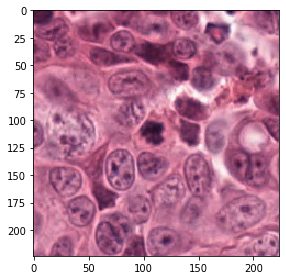

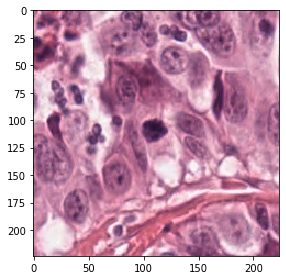

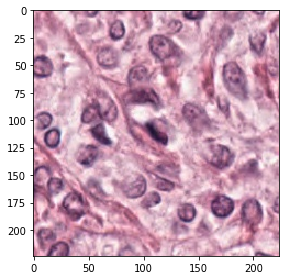

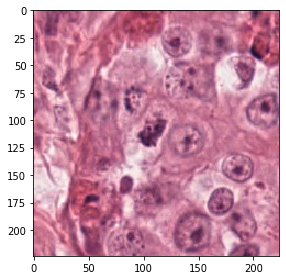

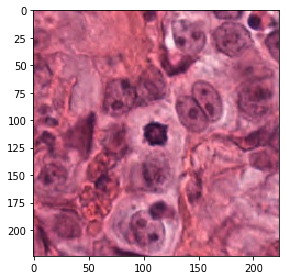

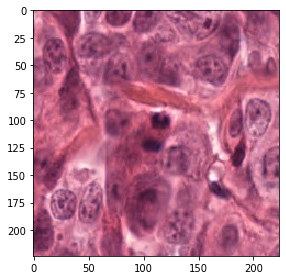

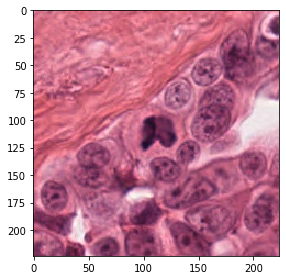

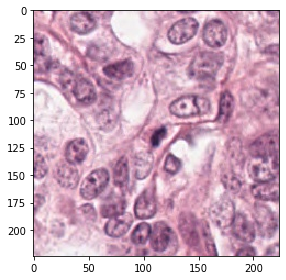

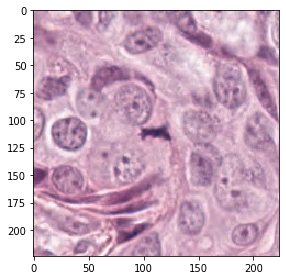

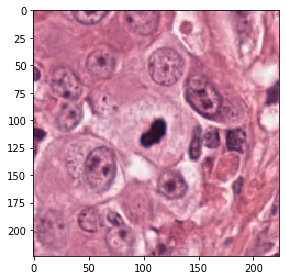

In [70]:
for x in range(10):
    io.imshow(path + '/' +groups[0][x])
    io.show()

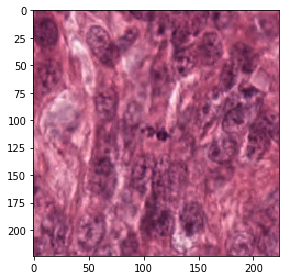

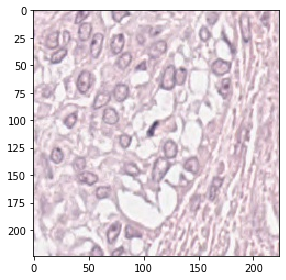

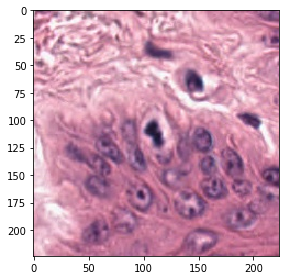

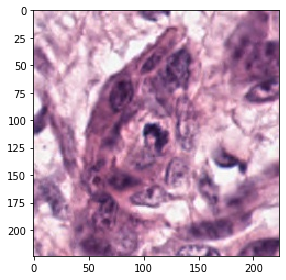

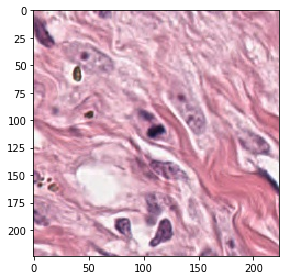

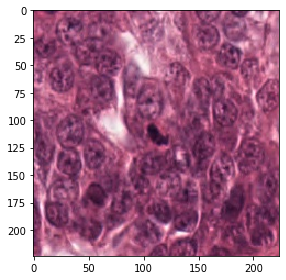

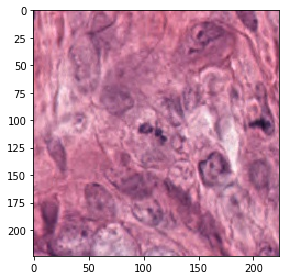

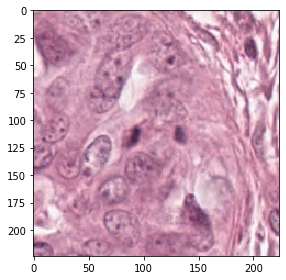

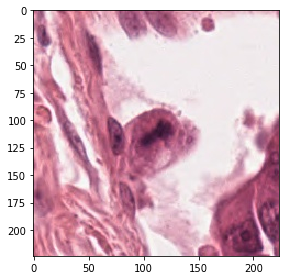

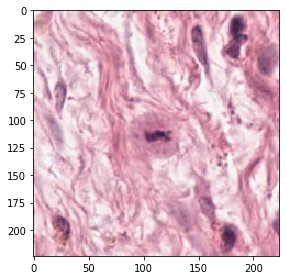

In [71]:
for x in range(10):
    io.imshow(path + '/' +groups[1][x])
    io.show()

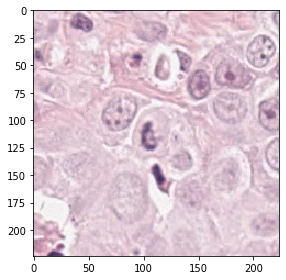

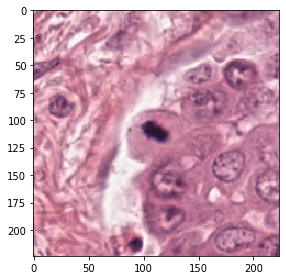

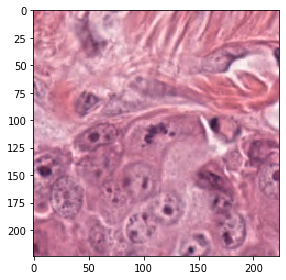

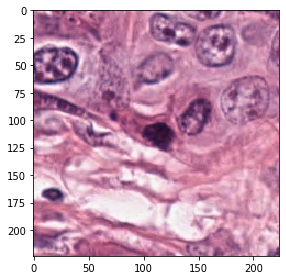

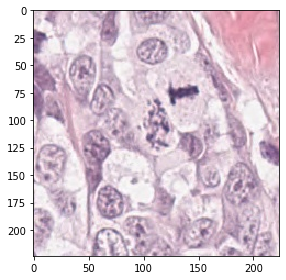

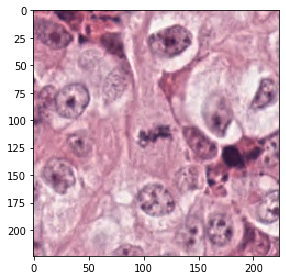

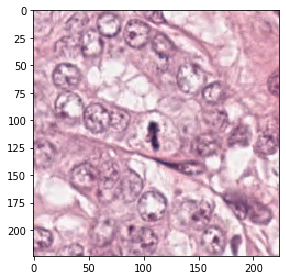

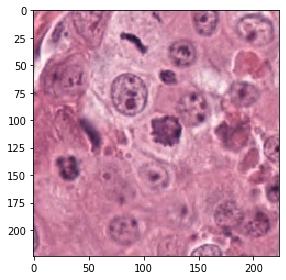

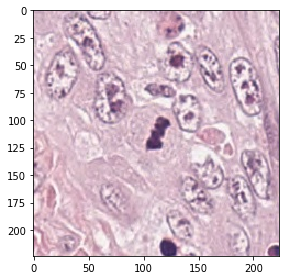

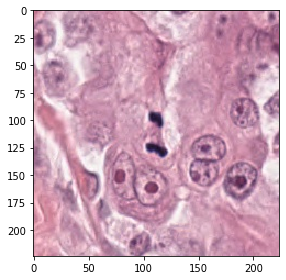

In [73]:
for x in range(10):
    io.imshow(path + '/' +groups[2][x])
    io.show()

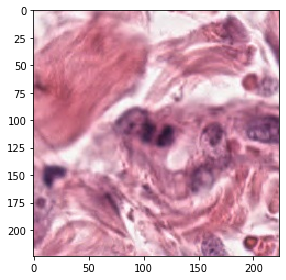

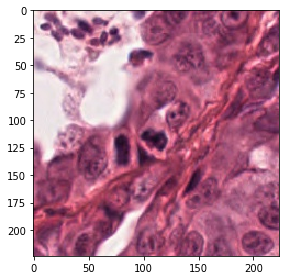

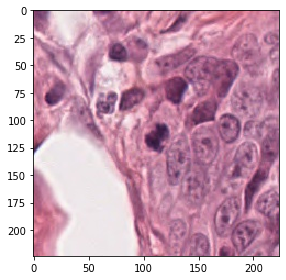

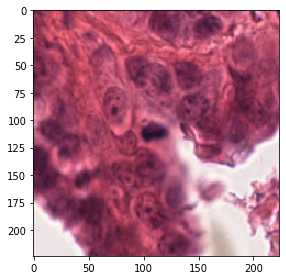

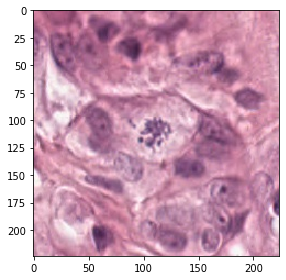

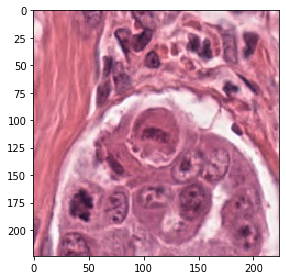

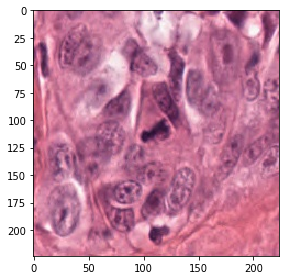

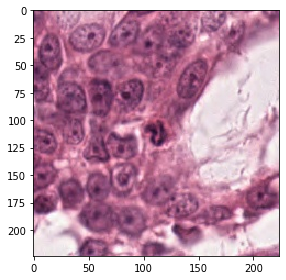

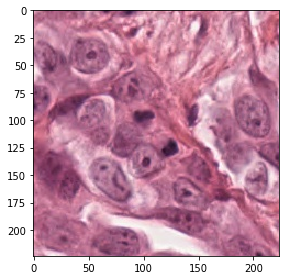

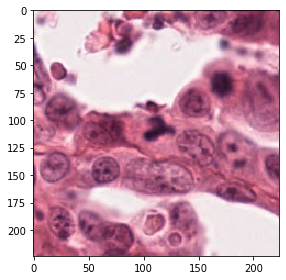

In [75]:
for x in range(10):
    io.imshow(path + '/' +groups[3][x])
    io.show()

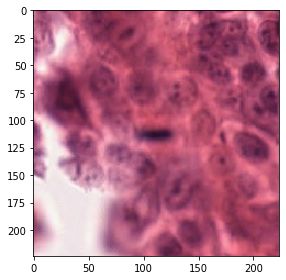

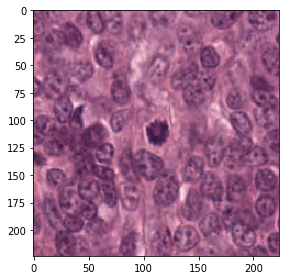

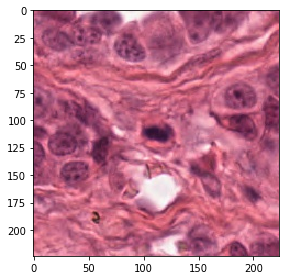

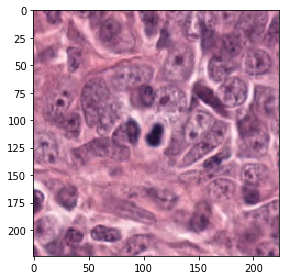

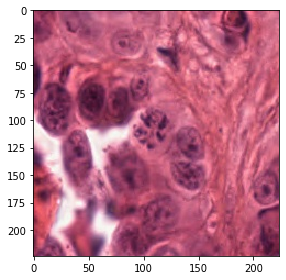

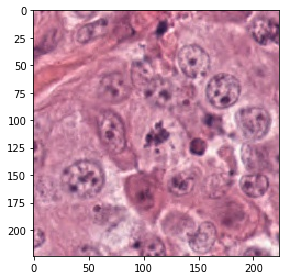

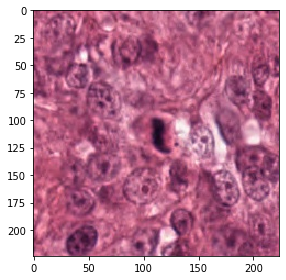

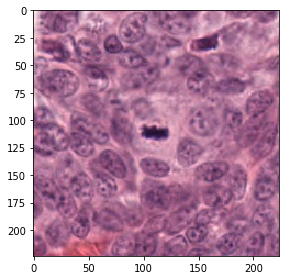

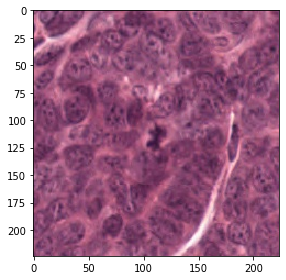

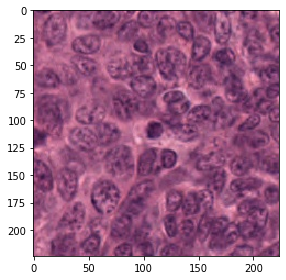

In [76]:
for x in range(10):
    io.imshow(path + '/' +groups[4][x])
    io.show()

In [38]:
!pwd

/bin/bash: /home/jmwolf/anaconda3/envs/tf_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/jmwolf/repos/XAI_Healthcare


In [40]:
%cd '../XAI_Healthcare/model_dev/'

/home/jmwolf/repos/XAI_Healthcare/model_dev


In [41]:
os.mkdir('group0')
os.mkdir('group1')
os.mkdir('group2')
os.mkdir('group3')
os.mkdir('group4')

In [47]:
len(groups[0])

1906

In [50]:
groups_0 = groups[0]
groups_1 = groups[1]
groups_2 = groups[2]
groups_3 = groups[3]
groups_4 = groups[4]

In [51]:
import shutil

In [52]:
dst_path = '/home/jmwolf/repos/XAI_Healthcare/model_dev/group0'

In [53]:
for files in groups_0:    
    shutil.copy(path + '/' + files, dst_path)

In [54]:
dst_path = '/home/jmwolf/repos/XAI_Healthcare/model_dev/group1'
for files in groups_1:    
    shutil.copy(path + '/' + files, dst_path)

In [55]:
dst_path = '/home/jmwolf/repos/XAI_Healthcare/model_dev/group2'
for files in groups_2:    
    shutil.copy(path + '/' + files, dst_path)

In [56]:
dst_path = '/home/jmwolf/repos/XAI_Healthcare/model_dev/group3'
for files in groups_3:    
    shutil.copy(path + '/' + files, dst_path)

In [57]:
dst_path = '/home/jmwolf/repos/XAI_Healthcare/model_dev/group4'
for files in groups_4:    
    shutil.copy(path + '/' + files, dst_path)